setting working dirictory 

In [28]:
%cd "C:\Users\user\.jupyter"

C:\Users\user\.jupyter


Importing necessary libraries

In [1081]:

import pandas as pd
import numpy as np
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pip
import sys
import webbrowser
import time
import requests
import os
from timeit import default_timer as timer


# 1 - Gathring data


1-twitter-archive-enhanced file in data frame


In [30]:
archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')


2.1 downloading image predictions file programatically

In [31]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url,allow_redirects=True)  


if not os.path.isfile(file_name):
    
    with open(file_name, mode = 'wb') as file:
        file.write(response.content)


2.2 Reading image-prediction file into data frame

In [32]:
image_prediction_df = pd.read_csv("image-predictions.tsv",sep = '\t')


3.1 Gathring Twitter's API data 

#define : 
accseseing my account via keyes

In [33]:
consumer_key = '*******'
consumer_secret = '*******'
access_token = '**********'
access_secret = '*******'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)




3.2 Query Twitter's API for data for each tweet ID in the Twitter archive


In [34]:

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_enhanced_df.tweet_id.values
len(tweet_ids)



2356

3.3 Query Twitter's API data for each tweet ID in the Twitter archive

In [238]:

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Writing the data into file
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


3326

In [75]:
#how many ids fails 
len (fails_dict) 



In [ ]:
#exp_tweet = api.get_status(archive_enhanced_df.tweet_id[100], tweet_mode = 'extended')
#content = exp_tweet._jsonlef
#content['retweet_count']
#content['id'], content['favorite_count'] , Content['user']['followers_count']


 

3.4 Reading API file into a dataframe


In [35]:
twitter_api_df = pd.read_json('tweet_json.txt',lines = True)


# 2 -  Assessing Data frames 
## first : Archive data frame

 - assessing data visualy by viewing csv file provided 
 - assessing data programmatically i used  (head , info, sample , shape , value_counts)
    

In [554]:
#make copy from the orignal file
archive_df_clean = archive_enhanced_df.copy()

In [1365]:
#display info data from archive data frame
archive_df_clean.head(3)
archive_df_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage_value,rating
4779,778039087836069888,nan,nan,2016-09-20 01:12:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,nan,nan,NaN,https://twitter.com/dog_rates/status/778039087...,12.0,10.0,,pupper,1.2
7792,679511351870550016,nan,nan,2015-12-23 03:58:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,nan,nan,NaN,https://twitter.com/dog_rates/status/679511351...,7.0,10.0,William,,0.7
8386,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,,,0.7


In [539]:
archive_df_clean.info()
archive_df_clean.descripe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2356.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,inf
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.1
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.2
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,inf


# Assessing image & twitter tables

make copies from filies 

In [ ]:
twitter_df_clean =twitter_api_df.copy()

In [733]:
image_df_clean  = image_prediction_df.copy()

In [722]:
#display info data from image prediction data frame
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [639]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [49]:
#display sample from twiter api data frame

pd.set_option('display.max_columns', None)

twitter_api_df.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2135,2015-11-25 17:25:28+00:00,669567591774625800,669567591774625792,Meet Kollin. He's a Parakeetian Badminton from...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669567582983331840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,48,220,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
624,2016-10-31 22:00:04+00:00,793210959003287553,793210959003287552,This is Maude. She's the h*ckin happiest wasp ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793210952363732998, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2777,8890,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1366,2016-02-18 02:54:41+00:00,700151421916807169,700151421916807168,If a pupper gave that to me I'd probably start...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700151417617694720, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,648,2175,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [663]:
image_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,1,kuvasz,0.223148,True,Bedlington_terrier,0.220731,True,teddy,0.181303,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True


In [620]:
#saving table in csv file in order to assess it visually 
image_prediction_df.to_csv('image_prediction_df.csv' , index = False)
image_df_clean.shape

(2075, 12)

In [77]:
#saving table in csv file in order to assess it visually 
twitter_api_df.to_csv('twitter_api.csv' , index = False)
twitter_api_df.shape

(2331, 32)

In [704]:
#srarch for dublicated image in image table
image_df_clean.jpg_url.duplicated().sum()


66

assessing the three algpratims & confidances


In [708]:
image_df_clean.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [709]:
image_df_clean.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [710]:
image_df_clean.p3_conf.describe()


count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [711]:
image_df_clean['p1_dog'].value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [712]:
image_df_clean['p2_dog'].value_counts()


True     1553
False     522
Name: p2_dog, dtype: int64

In [713]:
image_df_clean['p3_dog'].value_counts()


True     1499
False     576
Name: p3_dog, dtype: int64

#  quality and tidiness issues for image prediction and twitter api tables

## Tidness 

- Archive , image prediction and twitter api tables must be in one dataframe
- tweet_id dublicated in three tables and source column is dublicatrd in enhanced table and twitter_api table
- Column headers in image are values, not variable names.


## Quality

As per twiter data dictionary The integer representation of the unique identifier for this Tweet. This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it.
- Erroneous datatypes
- Erroneous datatypes of id & id_str columns in api dataframe  as int
- Erroneous datatypes of tweet_id in image predction dataframe as int
- Erroneous datatypes of  favorite_count and retweet_count
completness
- 66 jpj url dublicatd in image table
- missing values 
- columns names in image preditction data frame
 
consisstancy
- omiiting replies tweets from dataframe


## Tidness issues for archive table
- Four columns of dog stage [doggos,floofer, pupper and puppo]should be one column (dog_satge)
- No column for rating
- text column in archive_enhanced table should be split into tweet , rating and url_link 

# quality issues in archive table :
## Erroneous datatypes ( consistancy ) 
AS per twitter data dictionary tweet id the integer representation of the unique identifierfor this Tweet.
- Erroneous datatypes of id's columns as int
- Erroneous datatypes of rating_numerator as int 
- Erroneous datatypes of rating_denominator as int
- Erroneous datatypes of timestamp , data and time in same column
- adding year column in data for visulaiing purpous

This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it.


## completness & validation  
- replace (None ,a ,an ,Al,all ,not , by ,O ,actually , my , the) in name column 
- Some tweets are actually retweets and replies not original tweets that have to be deleted as per the data wrangling 
- none value in name , doggos,floofer, pupper and puppo columns
- Four columns of dog stage [doggos,floofer, pupper and puppo]should be one column (dog_satge) and then soreted and removing dublicates resulted from this merg


# 3- Cleaning data 


define: removing retweets,replies from data frame
we have 78 replies and 181 retweets

In [823]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [824]:
#code
#archive_df_clean = archive_df_clean[(archive_df_clean.retweeted_status_id == 'NaN')| (archive_df_clean.in_reply_to_status_id=='NaN')]
archive_df_clean = archive_df_clean.query('retweeted_status_id == "NaN"')
archive_df_clean = archive_df_clean.query(' in_reply_to_status_id=="NaN"')

In [825]:
#test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

## cleaning tidness issue


define : replace none value in name,doggo,floofer,pupper,puppo by nan columns                                                                                                     

In [826]:
#code
archive_df_clean['name'] = archive_df_clean['name'].replace('None' , '')
archive_df_clean['doggo'] = archive_df_clean['doggo'].replace('None' , '')
archive_df_clean['floofer'] = archive_df_clean['floofer'].replace('None' , '')
archive_df_clean['pupper'] = archive_df_clean['pupper'].replace('None' , '')
archive_df_clean['puppo'] = archive_df_clean['puppo'].replace('None' , '')





In [1370]:
#code
#replacig null values by nan
archive_df_clean.replace('',np.nan)

In [1369]:
#test 
archive_df_clean.sample(3)

define:
2-melting four columns of dog satge into one column[dog_satge]

In [829]:
#code
archive_df_clean.columns
unchange_columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name' ]
columns_to_cahnge= ['doggo', 'floofer', 'pupper', 'puppo']

archive_df_clean = pd.melt(archive_df_clean, id_vars=unchange_columns, value_vars=columns_to_cahnge, var_name='dog_stage', value_name='dog_stage_value', col_level=None)


In [830]:
archive_df_clean.shape

(8388, 15)

In [831]:
archive_df_clean.dog_stage.value_counts()

floofer    2097
doggo      2097
puppo      2097
pupper     2097
Name: dog_stage, dtype: int64

In [832]:
archive_df_clean.dog_stage_value.value_counts()

           8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage_value, dtype: int64

In [833]:
#define : sort columns by tweet_id & dog_satge_value to drop dublicates
#code :
archive_df_clean = archive_df_clean.sort_values(by=['tweet_id' ,'dog_stage_value'])


In [835]:
archive_df_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage_value
2670,779834332596887552,NaN,NaN,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,floofer,
1411,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,,doggo,


In [836]:
#define: after sorting the value sorted last , will drop dublication and keep last value 
#code 
archive_df_clean.drop_duplicates(subset =['tweet_id'], keep = 'last', inplace = True)

In [837]:
#test 
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 8387 to 6291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  dog_stage                   20

In [838]:

#define : drop name column reslted from melting 
#code 
archive_df_clean.drop('dog_stage' , inplace = True , axis = 1)

In [840]:
#test 
archive_df_clean.dog_stage_value.value_counts()
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 8387 to 6291
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  dog_stage_value             20

## cleaning quality issue



define : converting columns of id to str 

In [841]:
#lis=  ['tweet_id' ,'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id' ,'retweeted_status_user_id']

convert_dict = {'tweet_id' : str ,'in_reply_to_status_id': str, 'in_reply_to_user_id':str,'retweeted_status_id':str ,'retweeted_status_user_id':str}
archive_df_clean = archive_df_clean.astype(convert_dict)



In [633]:
#test 
archive_df_clean.dtypes

tweet_id                      object
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_satge_value               object
dtype: object

define : converting column of timestamp to python datetime and spillting column into date column & time column 

In [1403]:
#code
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])
#
archive_df_clean['new_time'] = [d.time() for d in archive_df_clean['timestamp']]
#df['year'] = pd.DatetimeIndex(df['ArrivalDate']).year
archive_df_clean['year'] = pd.DatetimeIndex(archive_df_clean['new_date'])pdtimeindex.year
#caleaning quality issiues for visualusiation 
#master_df.timestamp = pd.to_datetime(master_df.timestamp) 
#master_df['year'] = master_df['timestamp'].dt.year
#master_df.year= pd.to_datetime(master_df.year) 


In [1404]:
#test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 8387 to 6291
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       2097 non-null   object             
 2   in_reply_to_user_id         2097 non-null   object             
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         2097 non-null   object             
 7   retweeted_status_user_id    2097 non-null   object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64      


define : 
Convert numerator and denominator to float

In [844]:
#code
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype(float)
archive_df_clean['rating_denominator'] = archive_df_clean['rating_denominator'].astype(float)

In [845]:
#test
archive_df_clean['rating_denominator'].dtype
archive_df_clean['rating_numerator'].dtype
archive_df_clean['rating_denominator'].value_counts()





10.0     2080
50.0        3
11.0        2
80.0        2
150.0       1
70.0        1
90.0        1
110.0       1
170.0       1
7.0         1
20.0        1
40.0        1
120.0       1
2.0         1
Name: rating_denominator, dtype: int64

# caleaning one tidness issue 
define :
- adding column of rating by dividing rating_numerator over rating_denominator


In [846]:
#code
archive_df_clean['rating'] = archive_df_clean['rating_numerator'] / archive_df_clean['rating_denominator']

In [847]:
#test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 8387 to 6291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       2097 non-null   object             
 2   in_reply_to_user_id         2097 non-null   object             
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         2097 non-null   object             
 7   retweeted_status_user_id    2097 non-null   object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64      

define:  
- replace (None ,a ,an ,Al,all ,not , by ,O ,actually , my , the) in name column 

In [848]:
#code
pd.set_option('display.max_rows', final_df.shape[0]+1)
archive_df_clean['name'].value_counts()
archive_df_clean['name'].replace(('a', 'an', 'None' ,'all' ,'not','by' ,'O' ,'the'), (''), inplace=True)


In [849]:
#test
archive_df_clean['name'].value_counts()


                  677
Charlie            11
Lucy               11
Oliver             10
Cooper             10
Tucker              9
Penny               9
Lola                8
Sadie               8
Winston             8
Toby                7
Daisy               7
Oscar               6
Bo                  6
Bella               6
Koda                6
Bailey              6
Stanley             6
Jax                 6
Louis               5
Milo                5
Rusty               5
Bentley             5
Chester             5
Scout               5
Leo                 5
Dave                5
Buddy               5
Clark               4
one                 4
Maggie              4
very                4
Chip                4
Jack                4
Phil                4
Alfie               4
Duke                4
Clarence            4
Gus                 4
Reggie              4
Jerry               4
Oakley              4
Boomer              4
Sammy               4
Dexter              4
Bear      

define :  convert erroness datatypes columns 

In [782]:
  
#code: 
convert_dict = {'id' : str ,'id_str': str }
twitter_df_clean = twitter_df_clean.astype(convert_dict)
twitter_df_clean = twitter_df_clean.astype({'favorite_count':int , 'retweet_count': int})


In [ ]:
image_df_clean = image_df_clean.astype({'tweet_id':str})


In [783]:
#test
twitter_df_clean.info()
image_df_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2254 non-null   datetime64[ns, UTC]
 1   id                             2254 non-null   object             
 2   id_str                         2254 non-null   object             
 3   full_text                      2254 non-null   object             
 4   truncated                      2254 non-null   bool               
 5   display_text_range             2254 non-null   object             
 6   entities                       2254 non-null   object             
 7   extended_entities              2036 non-null   object             
 8   source                         2254 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

In [ ]:
#define : ommitng replies twets by quering non null values in in_reply_to_status_id

In [739]:
#code
twitter_df_clean = twitter_df_clean.query('in_reply_to_status_id == "NaN"')

In [1237]:
#test 
twitter_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2254 non-null   datetime64[ns, UTC]
 1   id                             2254 non-null   object             
 2   id_str                         2254 non-null   object             
 3   full_text                      2254 non-null   object             
 4   truncated                      2254 non-null   bool               
 5   display_text_range             2254 non-null   object             
 6   entities                       2254 non-null   object             
 7   extended_entities              2036 non-null   object             
 8   source                         2254 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

define : drop jpg_url dublicates

In [741]:

#code:
image_df_clean.drop_duplicates(subset =['jpg_url'], inplace = True)


In [742]:
#test
image_df_clean.jpg_url.duplicated().sum()

0

In [1033]:
#rename columns in image preditction data frame
image_df_clean.rename(columns={'p1':'prediction_image_Alg1' , 'p2':'prediction_image_Alg2' ,'p3':'prediction_image_Alg3'} ,inplace = True )

 define : 
- cleaning incorrect names in prediction_image_Alg1

In [1374]:
#incorrect_names = ['pencil_box' , 'coffee_mug' ,'traffic_light', 'desktop_computer' ,'crash_helmet']
image_df_clean['prediction_image_Alg1'].replace(('pencil_box' , 'coffee_mug' ,'traffic_light', 'desktop_computer' ,'crash_helmet'),('')
, inplace=True)


In [1378]:
#test
image_df_clean.prediction_image_Alg1.sample

<bound method NDFrame.sample of 0               Welsh_springer_spaniel
1                              redbone
2                      German_shepherd
3                  Rhodesian_ridgeback
4                   miniature_pinscher
5                 Bernese_mountain_dog
6                           box_turtle
7                                 chow
8                        shopping_cart
9                     miniature_poodle
10                    golden_retriever
11                       Gordon_setter
12                        Walker_hound
13                                 pug
14                          bloodhound
15                               Lhasa
16                      English_setter
17                                 hen
18                                    
19                   Italian_greyhound
20                         Maltese_dog
21                    three-toed_sloth
22                                  ox
23                    golden_retriever
24                            ma

#define 
merging image_predictions dataframe to guide the selection and removal of tweets without photos in the archive dataframe
and then merging with api datfram to creat one master dataset


In [1397]:
#code
#merging archive with image on tweet_id to remove tweets without images 
merged_df = archive_df_clean.merge(image_df_clean, on='tweet_id',how='right')
#merging this merged dataset with twiteer api datafram to make one master dataset for analysis and insights
master_df =merged_df.merge(twitter_df_clean ,left_on ='tweet_id',right_on ='id', how = 'left')



In [1398]:
#test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2009 non-null   object             
 1   in_reply_to_status_id_x        1971 non-null   object             
 2   in_reply_to_user_id_x          1971 non-null   object             
 3   timestamp                      1971 non-null   datetime64[ns, UTC]
 4   source_x                       1971 non-null   object             
 5   text                           1971 non-null   object             
 6   retweeted_status_id            1971 non-null   object             
 7   retweeted_status_user_id       1971 non-null   object             
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1971 non-null   object             
 10  rating_numerator        

In [752]:
master_df.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_satge_value,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_y,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1384,771380798096281600,nan,nan,2016-09-01 16:14:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fizz. She thinks love is a social constru...,nan,nan,NaN,https://twitter.com/dog_rates/status/771380798...,11.0,10.0,Fizz,,1.1,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True,2016-09-01 16:14:48+00:00,771380798096281600,771380798096281600,Meet Fizz. She thinks love is a social constru...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771380787874828288, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4977.0,10332.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
490,675822767435051008,nan,nan,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,nan,nan,NaN,https://twitter.com/dog_rates/status/675822767...,10.0,10.0,,,1.0,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710,True,chow,0.202765,True,Pekinese,0.133266,True,2015-12-12 23:41:18+00:00,675822767435051008,675822767435051008,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675822760556412928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,510.0,1447.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
129,668297328638447616,nan,nan,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,nan,nan,NaN,https://twitter.com/dog_rates/status/668297328...,9.0,10.0,,,0.9,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True,2015-11-22 05:17:54+00:00,668297328638447616,668297328638447616,2 rare dogs. They waddle (v inefficient). Some...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668297325815717888, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,274.0,584.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1585,810284430598270976,nan,nan,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,nan,nan,NaN,https://twitter.com/dog_rates/status/810284430...,13.0,10.0,Phil,,1.3,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True,2016-12-18 00:43:57+00:00,810284430598270976,810284430598270976,This is Phil. He's a father. A very good fathe...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810284425116315648, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,11132.0,34992.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN

In [1050]:
#fill nan value in retweet and favorite count columns by zero in order to viuslise it
master_df.fillna(value={'retweet_count': 0, 'favorite_count': 0} , inplace = True)
#conver dtype for reyweet and favotite count column 
master_df = master_df.astype({'retweet_count': int ,'favorite_count': int})

In [950]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2009 non-null   object             
 1   in_reply_to_status_id_x        1971 non-null   object             
 2   in_reply_to_user_id_x          1971 non-null   object             
 3   timestamp                      1971 non-null   datetime64[ns, UTC]
 4   source_x                       1971 non-null   object             
 5   text                           1971 non-null   object             
 6   retweeted_status_id            1971 non-null   object             
 7   retweeted_status_user_id       1971 non-null   object             
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1971 non-null   object             
 10  rating_numerator        

# 4- Storing dataframe to csv file


In [1456]:
master_df.to_csv('twitter_archive_master.csv' , index =False )


# 5- Analyze & Visualize data



##  Measuring the poupliraty of sepcific tweet/dog via favourit & retweet
As per twitter data dicionary 
- favorited : Indicates whether this Tweet has been liked by the authenticating user
- favorite_count : Indicates approximately how many times this Tweet has been liked by Twitter users.
- retweeted : Indicates whether this Tweet has been Retweeted by the authenticating user
- retweet_count : Number of times this Tweet has been retweeted


In [855]:
master_df['favorited'].value_counts()
master_df['retweeted'].value_counts()

False    1977
Name: retweeted, dtype: int64

In [775]:
master_df['favorite_count'].describe()

count      1977.000000
mean       8073.015175
std       11931.336732
min           0.000000
25%        1688.000000
50%        3605.000000
75%       10041.000000
max      152216.000000
Name: favorite_count, dtype: float64

In [776]:
master_df['retweet_count'].describe()

count     1977.000000
mean      2381.823976
std       4272.594753
min         11.000000
25%        526.000000
50%       1145.000000
75%       2719.000000
max      75319.000000
Name: retweet_count, dtype: float64

## High mean of both favorited and retweetes counts showed how popularity and engagment were very high , while high STD showed that high variatoin of pouplriaty and engagment for each tweet .

#observation
 - quering the most tweet in terms of favourit and retweet

In [1001]:
#code
most_favourited_retweeted_tweet = master_df[(master_df['favorite_count'] == 152216) & (master_df['retweet_count'] == 75319) ]
#test
most_favourited_retweeted_tweet

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage_value,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_y,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,year
1201,744234799360020481,nan,nan,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,nan,nan,NaN,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,,doggo,1.3,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,2016-06-18 18:26:18+00:00,744234799360020481,744234799360020480,Here's a doggo realizing you can stand in a po...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 744234667679821824, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,75319,152216,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002016


## Top Tweet  
- has tweet_id no = 744234799360020481 
- tweet text is  : "Here's a doggo realizing you can stand in a pool"
- rating : 13/10 
- enlightened af (vid by Tina Conrad)"  
- link :  https://t.co/7wE9LTEXC4 
- dog_breed : doggo 

# Top Tweets based on favorite_count 


In [998]:
# query tweet_id, name , favorite  count and retweet count 
top_tweet_df = master_df[['id' ,'name', 'favorite_count', 'retweet_count','created_at' ,'dog_stage_value']].copy()
# Sort desccending
top_tweet_df.sort_values(by=['favorite_count'], inplace=True, ascending=False)
#top five tweets
top_tweet_df.head(5)

,id,name,favorite_count,retweet_count,created_at,dog_stage_value
1201,744234799360020481,,152216,75319,2016-06-18 18:26:18+00:00,doggo
1664,822872901745569793,,129859,42425,2017-01-21 18:26:02+00:00,puppo
1573,807106840509214720,Stephan,117515,54940,2016-12-09 06:17:20+00:00,
1862,866450705531457537,Jamesy,113754,32031,2017-05-22 00:28:40+00:00,pupper
1166,739238157791694849,,112534,56092,2016-06-04 23:31:25+00:00,doggo


In [999]:
master_df['dog_stage_value'].value_counts()

           1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_stage_value, dtype: int64

## define :
ploting retweet & favorite counts to get if there is a correlation



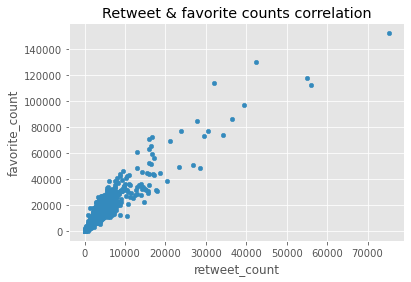

In [1428]:
#code
master_df.plot.scatter('retweet_count','favorite_count' ,title = 'Retweet & favorite counts correlation');
plt.savefig('scatter.jpg')

## insight : 
we can say there is a positive correlation between the retweet_count & favorite_count 

##  define : display the average confidance for each algorthim 


In [1429]:
#code
image_df_clean.p1_conf.mean()

0.594466804181185

In [1037]:
image_df_clean.p2_conf.mean()

0.13407270362534246

In [1038]:
image_df_clean.p3_conf.mean()

0.06017061458913435

## insight :
After sorting the data descentengly by algorethim 2 and algorethim 3 I noticed algorethim 1 is more confident than algorethim 2 and algorethim 3 in all cases. Besides, Avrage confidance for each algorethim showes that algorethim 1 is the most confidantial algorathim



## detecting most lovely breed of the dogs 


In [1312]:
#lets find most favorite and retweeted breed of the dogs according to prediction_image_Alg1 
#grouping data by alg_1 with 2 indexs favorite and retweet counts
lovely_breed = master_df.groupby('prediction_image_Alg1')[['favorite_count' ,'retweet_count']].sum().sort_values(by = ['favorite_count'],ascending=False).head(10)




## define
lets visualise the data for more insihts & clrarifcation

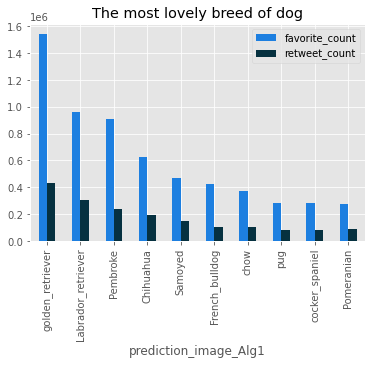

In [1430]:
#code : 
colors = [ '#1d7fe0' ,'#063140']
lovely_breed.plot(kind = 'bar' , title = 'The most lovely breed of dog' ,color = colors );
#saving image in jpg format to use it in the report
plt.savefig('lovely breed.jpg')

## insight :
golden_retriever is the most dog breed has favorites and retweet at the same time

## Define : 
lets find most favorite and retweeted dog stage of the dogs.

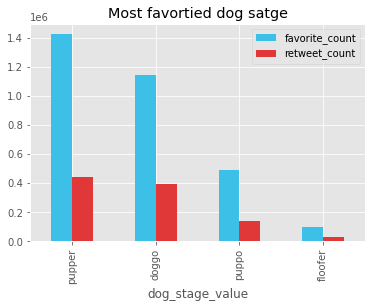

In [1432]:
#code
#groping data by dog satge with favorite count as index & sorting values decinding to get top dog satge
dog_stage = master_df.groupby('dog_stage_value')[['favorite_count' ,'retweet_count']].apply(sum).sort_values(by =['favorite_count'] ,ascending = False).tail(4)
#visualising data into bar cahrt for more insights 
dog_stage.plot(kind = 'bar' , color = ['#3cc0e8' , '#e03838'] , title = 'Most favortied dog satge');
plt.savefig('dog_stage.jpg')

## insight :
- Pupper & Doggo are the most dog stage got favorites and retweets while pupper satge is slightly higher.
- Floofer is the less dog satge to get favorites and retweets.

In [1435]:
#Define :
#lets find Highst rating breeds of dogs according to prediction_image_Alg1


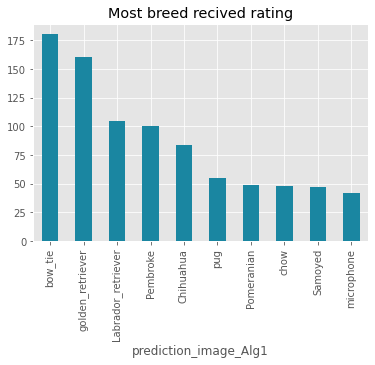

In [1440]:
#group by the most condidanital algorathim (prediction_image_Alg1) and index by rating and sort the values decending
breed_rating = master_df.groupby('prediction_image_Alg1')['rating'].sum().sort_values(ascending=False).head(10)
breed_rating.plot(kind = 'bar' , color ='#1a86a1' , title = 'Most breed recived rating');
plt.savefig('top_rating.jpg')

### insight :
bow_tie is the most breed to recive rating and was slightly higher than golden_retriever & Labrador_retriever 

# insight : 
golden_retriever is the most breed image that has been favortird and retweered by follwers  and the second dog to recive rating on we_rate_dogs account.

In [1437]:
#less_favorited_breed = master_df.groupby('prediction_image_Alg1')[['favorite_count' ,'retweet_count']].sum().sort_values(by = ['favorite_count'],ascending=True).head(10)
#less_favorited_breed

## define :
Ploting rating column into box blot to show outliers

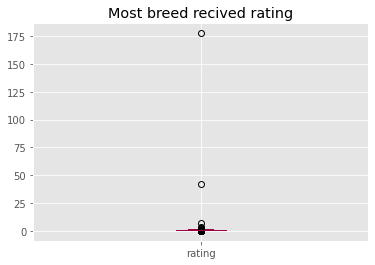

In [1438]:
master_df.rating.plot(kind = 'box' , color ='#9c0244' , title = 'Most breed recived rating');
plt.savefig('box_outliers.jpg')

## insight 
The graph showes extreem rating outliers which might by conssistancy issue need to be caleand


In [ ]:
#deine : 
Year that have higher engament by followers


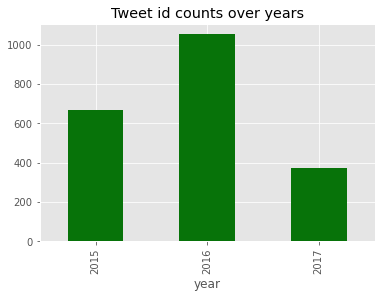

In [1455]:
#code
year_df = archive_df_clean.groupby('year')['tweet_id'].count()
year_df
year_df.plot(kind = 'bar',color = '#077309', title = 'Tweet id counts over years');
plt.savefig('Year_of_engament.jpg')

# insight: 
2016 year was the most year got engament from the followers on the account

# appendix

In [1324]:
#displaying data tables used for visulaiston 

lovely_breed



,favorite_count,retweet_count
prediction_image_Alg1,,
golden_retriever,1542196,432916
Labrador_retriever,962120,302048
Pembroke,907727,241041
Chihuahua,625233,193501
Samoyed,468420,149736
French_bulldog,427084,103971
chow,370294,101244
pug,284639,83857
cocker_spaniel,281152,85444


In [1425]:
year_df

year
2015     668
2016    1054
2017     375
Name: tweet_id, dtype: int64

In [1321]:
dog_stage


,favorite_count,retweet_count
dog_stage_value,,
,12802356,3697538
pupper,1423774,442658
doggo,1142752,392897
puppo,493615,141156
floofer,97854,32480


In [1323]:
breed_rating

prediction_image_Alg1
bow_tie               180.600000
golden_retriever      160.346753
Labrador_retriever    104.600000
Pembroke              100.700000
Chihuahua              83.400000
pug                    55.300000
Pomeranian             48.900000
chow                   47.600000
Samoyed                46.800000
microphone             42.000000
Name: rating, dtype: float64

In [1416]:
#display avrage retweet for each dog stage  
#avg_retweet_count_dog_stage = master_df.groupby('dog_stage_value').retweet_count.sum()
#avg_retweet_count_dog_stage.sort_values(ascending = False)

dog_stage_value
           3697538.0
pupper      442658.0
doggo       392897.0
puppo       141156.0
floofer      32480.0
Name: retweet_count, dtype: float64

In [1426]:
#display avrage favourite count for each dog stage  
#avg_favorite_count_dog_stage = master_df.groupby('dog_stage_value').favorite_count.sum()
#avg_favorite_count_dog_stage.sort_values(ascending = False)
